In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook as tqdm
import nltk

import matplotlib.pyplot as plt
%matplotlib inline

from importlib import reload

from ReviewFeatureExtractor import ExtractBoW

### Hyperparameters

In [2]:
VOC_SIZE = 100000
REVIEW_CUTOFF_DATE = pd.Timestamp(2015, 12, 31)

### All Words

In [3]:
e = ExtractBoW(voc_size=VOC_SIZE)

e.load_word_vecs('data/wiki-news-300d-1M.vec')

### Need to iterate through each business and person

In [4]:
df_reviews = pd.read_pickle('results/tor_reviews.p')  # reviews
df_reviews['date'] = df_reviews['date'].astype('datetime64[ns]')
df_reviews = df_reviews[df_reviews['date'] > REVIEW_CUTOFF_DATE]

df_bus = pd.read_pickle('results/rest_univ.p')  # businesses
df_users = pd.read_pickle('results/tor_users.p')  # users

### What is the distribution of review dates?

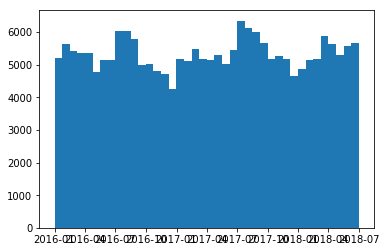

In [5]:
plt.hist(df_reviews['date'].values, bins=40)
plt.show()

In [6]:
print(df_bus.shape)
print(df_users.shape)
print(df_reviews.shape)

(13140, 15)
(96607, 21)
(213101, 9)


In [7]:
df_reviews.columns

Index(['business_id', 'cool', 'date', 'funny', 'review_id', 'stars', 'text',
       'useful', 'user_id'],
      dtype='object')

In [8]:
res_dict = {}

for i, bus_id in tqdm(enumerate(df_bus.index)):
    reviews_df = df_reviews[df_reviews['business_id'] == bus_id]
    tot_reviews = reviews_df.shape[0]
    
    # print("now processing %s with %s reviews" % (bus_id, tot_reviews))
    
    avg_stars = reviews_df['stars'].mean()
    tot_cool = reviews_df['cool'].sum()
    tot_funny = reviews_df['funny'].sum()
    tot_useful = reviews_df['useful'].sum()
    
    texts = reviews_df['text'].values
    
    if tot_reviews > 0:
        vec_all = e.extract(texts)
        vec_n = e.extract(texts, word_type=e.WORD_TYPE_NOUN)
        vec_j = e.extract(texts, word_type=e.WORD_TYPE_ADJ)
        vec_v = e.extract(texts, word_type=e.WORD_TYPE_VERB)
    else:
        vec_all = np.zeros(e.loaded_embeddings.shape[1])
        vec_n = np.zeros(e.loaded_embeddings.shape[1])
        vec_j = np.zeros(e.loaded_embeddings.shape[1])
        vec_v = np.zeros(e.loaded_embeddings.shape[1])
        
    res_dict[bus_id] = {
        'tot_reviews': tot_reviews,
        'avg_stars': avg_stars,
        'tot_cool': tot_cool,
        'tot_funny': tot_funny,
        'tot_useful': tot_useful,
        'vec_all': vec_all,
        'vec_n': vec_n,
        'vec_j': vec_j,
        'vec_v': vec_v,
    }
    
    if i % 500 == 0:
        print("processed %s/%s businesses" % (i, len(df_bus.index)))
    
res_df = pd.DataFrame(res_dict).T

processed 0/13140 businesses
processed 500/13140 businesses
processed 1000/13140 businesses
processed 1500/13140 businesses
processed 2000/13140 businesses
processed 2500/13140 businesses
processed 3000/13140 businesses
processed 3500/13140 businesses
processed 4000/13140 businesses
processed 4500/13140 businesses
processed 5000/13140 businesses
processed 5500/13140 businesses
processed 6000/13140 businesses
processed 6500/13140 businesses
processed 7000/13140 businesses
processed 7500/13140 businesses
processed 8000/13140 businesses
processed 8500/13140 businesses
processed 9000/13140 businesses
processed 9500/13140 businesses
processed 10000/13140 businesses
processed 10500/13140 businesses
processed 11000/13140 businesses
processed 11500/13140 businesses
processed 12000/13140 businesses
processed 12500/13140 businesses
processed 13000/13140 businesses



In [9]:
res_df.to_pickle('results/bus_review_extracts.p')

In [10]:
tor_df = pd.read_pickle('results/rest_univ_filter.p')

In [11]:
tor_df.shape

(10914, 16)